In [5]:
import os
import torch
import numpy as np
import torch.nn.functional as F
import subprocess

def standard_grid(size,batch_size=1,device='cuda'):
    """
    equivalent to 
    grid_trans = torch.eye(4).unsqueeze(0)
    F.affine_grid(grid_trans[:,:3,:], torch.Size((1, 3, D,H,W)))
    but more efficient and flexible

    size: (H,W) or (D,H,W)

    return: (B,H,W,2) or (B,D,H,W,3)

    """

    dim = len(size)

    axis = []
    for i in size:
        tmp = torch.linspace(-1+1/i, 1-1/i, i, device=device)
        
        axis.append(tmp)
    
    grid = torch.stack(torch.meshgrid(axis), dim=-1)
    print("grid.shape1:",grid.shape)

    grid = torch.flip(grid, dims=[-1]).contiguous()
    print("grid.shape2:",grid.shape)

    batch_grid = grid.unsqueeze(0).repeat((batch_size,)+(1,)*(dim+1))
    print("(batch_size,)+(1,)*(dim+1):",(batch_size,)+(1,)*(dim+1))

    return batch_grid

In [6]:
# print("grid.shape:",grid.shape)

grid.shape1: torch.Size([60, 60, 2])
grid.shape2: torch.Size([60, 60, 2])
(batch_size,)+(1,)*(dim+1): (1, 1, 1, 1)
sg: (1, 60, 60, 2)


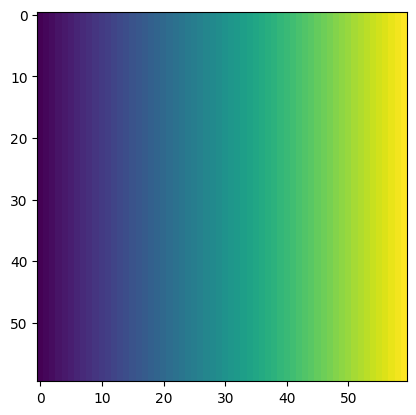

In [17]:
sg = standard_grid((60,60),1).cpu().numpy()
print("sg:",sg.shape)
## 可视化sg

import matplotlib.pyplot as plt
## 可视化 sg 为二维图像，所以只取第一个维度

plt.imshow(sg[0,:,:,0])
print("sg[0,:,:,0]",sg[0,:,:,0] )

In [8]:
sg.shape

torch.Size([1, 60, 60, 2])

In [16]:
H = W = 60
D = 1
grid_trans = torch.eye(4).unsqueeze(0)
sg2 = F.affine_grid(grid_trans[:,:3,:], torch.Size((1, 3, D, H, W)))
print("grid_trans:",grid_trans)
print("grid_trans:",grid_trans.shape)
print(sg2.shape)
print("grid_trans[:,:3,:]",grid_trans[:,:3,:])

grid_trans: tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]])
grid_trans: torch.Size([1, 4, 4])
torch.Size([1, 1, 60, 60, 3])
grid_trans[:,:3,:] tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]]])


/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [10]:
grid_trans

tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]])

In [1]:
# 将mp4视频的第一帧放到指定文件夹
import cv2
import os

def extract_first_frame(source_folder, target_folder):
    for video_name in os.listdir(source_folder):
        if video_name.endswith('.mp4'):
            video_path = os.path.join(source_folder, video_name)
            cap = cv2.VideoCapture(video_path)
            ret, frame = cap.read()
            if ret:
                frame_name = os.path.splitext(video_name)[0] + '.jpg'
                frame_path = os.path.join(target_folder, frame_name)
                cv2.imwrite(frame_path, frame)
            cap.release()

# 使用方法
source_folder = '/root/autodl-tmp/训练视频数据'
target_folder = '/root/autodl-tmp/MICA/demo/input'
extract_first_frame(source_folder, target_folder)

In [2]:
import cv2

def convert_mp4_to_avi(mp4_video_path, avi_video_path):
    # 创建VideoCapture对象
    cap = cv2.VideoCapture(mp4_video_path)

    # 获取视频的宽度和高度
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # 创建VideoWriter对象
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(avi_video_path, fourcc, 25, (frame_width, frame_height))

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == True:
            out.write(frame)
        else:
            break

    # 释放资源
    cap.release()
    out.release()

# 使用方法
source = '/root/autodl-tmp/训练视频数据/WDA_TedLieu_000_25fps.mp4'
target = '/root/autodl-tmp/metrical-tracker/input/WDA_TedLieu_000_25fps/WDA_TedLieu_000_25fps.avi'

convert_mp4_to_avi(source, target)

In [ ]:
## 执行 MICA 算法，获取 FLAME 的 shape 参数，保存在 identity.npy 文件
def extract_identity(input_folder, output_folder):
    # 构建命令行参数
    cmd = [
        'python', 'demo.py',
        '-i', input_folder,
        '-o', output_folder,
        # '-a', arcface_folder,
        # '-m', model_path
    ]

    # 调用subprocess.run执行命令
    subprocess.run(cmd)

In [ ]:
import os
import yaml

def generate_yml_for_idnames(source_path, target_directory='/root/autodl-tmp/FlashAvatar-code/metrical-tracker/configs/actors'):
    # 确保目标目录存在
    target_directory = target_directory
    os.makedirs(target_directory, exist_ok=True)
    
    # 遍历 source_path 下的每个子目录
    for idname in os.listdir(source_path):
        idname_path = os.path.join(source_path, idname)
        if os.path.isdir(idname_path):
            # 这里创建一个示例配置字典，实际情况下你可能需要根据实际情况来填充
            config_dict = {
                'actor': f'./input/{idname}',
                'save_folder': './output/',
                'optimize_shape': True,
                'optimize_jaw': True,
                'begin_frames': 1,
                'keyframes': [0, 1]
            }
            
            # 生成 YML 文件路径
            yml_file_path = os.path.join(target_directory, f"{idname}.yml")
            
            # 保存配置字典到 YML 文件
            with open(yml_file_path, 'w') as yml_file:
                yaml.dump(config_dict, yml_file)

# # 调用函数
# source_path = 'MICA_output_identity_shape'
# generate_yml_for_idnames(source_path)


In [ ]:
import subprocess
import os

def execute_tracker_for_all_idnames(configs_directory):
    # 遍历 configs_directory 下的每个 YML 文件
    for config_file in os.listdir(configs_directory):
        if config_file.endswith('.yml'):
            # 构建命令行指令
            command = f"python tracker.py --cfg ./configs/actors/{config_file}"
            
            # 在命令行中执行指令
            try:
                # 这里使用 subprocess.run()，注意shell=True的安全警告
                result = subprocess.run(command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
                print(f"成功执行: {config_file}\n{result.stdout.decode('utf-8')}")
            except subprocess.CalledProcessError as e:
                print(f"执行失败: {config_file}\n错误信息: {e.stderr.decode('utf-8')}")

# 调用函数
# configs_directory = '/root/autodl-tmp/FlashAvatar-code/metrical-tracker/configs/actors'
# execute_tracker_for_all_idnames(configs_directory)


### 做FlashAvatar数据集的脚本

In [ ]:
## 提取视频首帧到文件夹：
source_folder = '/root/autodl-tmp/训练视频数据' # 存放每个idname的mp4文件
MICA_input_frame = '/root/autodl-tmp/MICA/demo/input' # 存放每个idname的第一帧
extract_first_frame(source_folder, MICA_input_frame)
print("提取视频首帧到文件夹完成")


## 从 MICA_input_frame 文件夹中获取 id_name


## 执行 MICA 算法，获取 FLAME 的 shape 参数，保存在 identity.npy 文件
MICA_output_identity_shape = f'/root/autodl-tmp/FlashAvatar-code/metrical-tracker/input/' # 存放每个idname的shape参数
os.makedirs(MICA_output_identity_shape, exist_ok=True)
extract_identity(MICA_input_frame, MICA_output_identity_shape)

## 为每个 id_name 制作 yml 文件
tracker_config_dir =  '/root/autodl-tmp/FlashAvatar-code/metrical-tracker/configs/actors' # 存放每个idname的yml文件
generate_yml_for_idnames(MICA_output_identity_shape, tracker_config_dir)

# 根据 yml 文件执行 MICA 算法，获取 FLAME 的 shape 参数，保存在 /root/autodl-tmp/FlashAvatar-code/metrical-tracker/output

execute_tracker_for_all_idnames(tracker_config_dir)

'''
此时 FlashAvatar 的数据集已经准备好了，可以开始训练了
'''


